In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 14)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)[['Date', 'Country', 'Deaths']]

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

In [6]:
Deaths = pd.DataFrame()
Deaths['Date'] = country_df.Date.unique()
Deaths['Date'] = pd.to_datetime(Deaths.Date)
#Deaths = Deaths.set_index('Date')

In [7]:
countries = country_df['Country'].unique()
for c in countries:
    cun = country_df[country_df.Country == c].Deaths
    if 'Korea' in c:
        c = 'S.Korea'
    if c == 'United Kingdom':
        c = 'UK'
    Deaths[c] = list(cun)
Deaths = Deaths.set_index('Date')

In [8]:
Important_countries = ['India', 'World', #'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'UK', 'France',
                      'S.Korea', 'Iran', 
                       'Russia', 'Mexico', 'Canada']#[::-1]
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'orange', 'Germany': 'Green', 'Australia': 'Teal',
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal'}
def plotter(DF, name, log = True):
    plt.figure(figsize = (14, 7))
    if log:
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend()
    plt.show()

In [9]:
def plot2(DF, DF2, name1, name2 = 'Deaths', log = True):
    plt.figure(figsize = (14, 7))
    if log:
        plt.xscale('log')
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend()
    plt.show()

In [10]:
Deaths.tail(14)[Important_countries]

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-07-06,20159,537963,130285,9022,34869,28388,4641,44321,29923,285,11731,10280,31119,8748
2020-07-07,20642,544070,131480,9032,34899,28392,4641,44476,29936,285,11931,10478,32014,8765
2020-07-08,21129,549389,132300,9046,34914,28396,4641,44602,29936,287,12084,10650,32796,8786
2020-07-09,21604,554847,133290,9057,34926,28401,4641,44687,29982,288,12305,10826,33526,8797
2020-07-10,22123,560158,134101,9063,34938,28403,4641,44735,30007,288,12447,11000,34191,8811
2020-07-11,22673,565055,134777,9070,34945,28403,4641,44883,30007,289,12635,11188,34730,8818
2020-07-12,23174,569009,135205,9071,34954,28403,4641,44904,30007,289,12829,11318,35006,8829
2020-07-13,23727,572824,135566,9074,34967,28406,4641,44915,30032,289,13032,11422,35491,8836
2020-07-14,24309,578484,136466,9078,34984,28409,4642,45053,30032,289,13211,11597,36327,8845


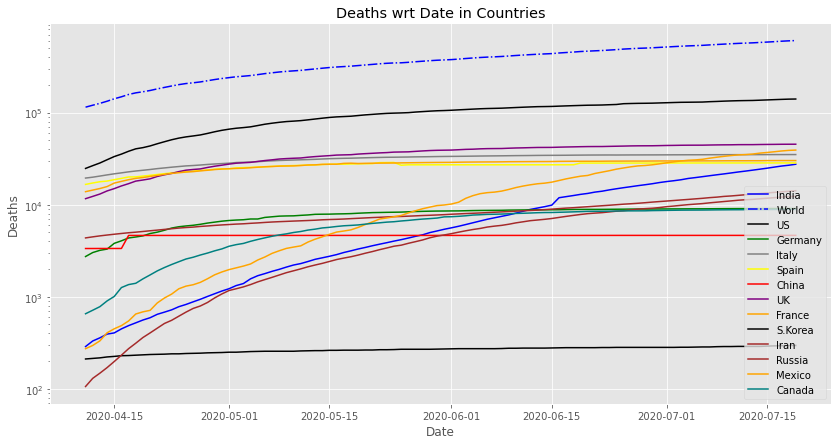

In [11]:
plotter(Deaths[Important_countries].tail(100), 'Deaths')

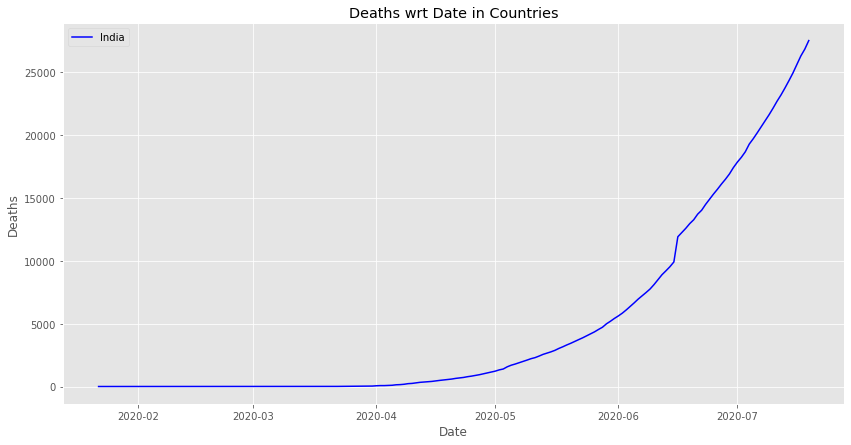

In [12]:
plotter(Deaths[['India']], 'Deaths', False)
#Deaths[['India']].tail(50)

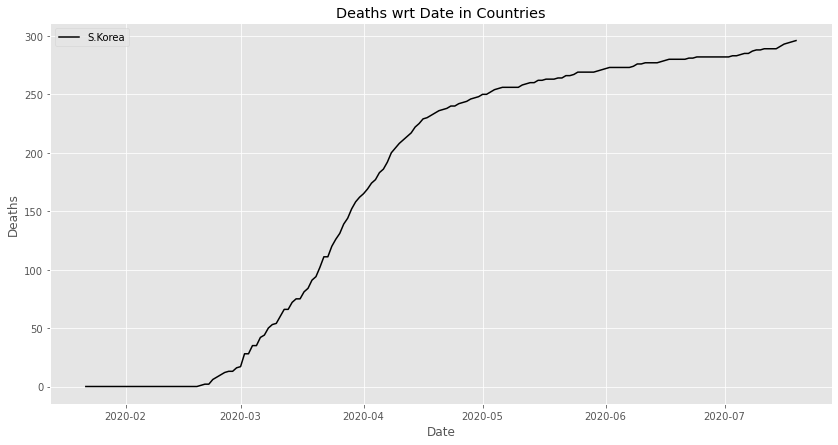

In [13]:
plotter(Deaths[['S.Korea']], 'Deaths', False)

In [14]:
Removed = np.round(Deaths/0.01).astype('int')
Removed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-07-06,2015900,53796300,13028500,902200,3486900,2838800,464100,4432100,2992300,28500,1173100,1028000,3111900,874800
2020-07-07,2064200,54407000,13148000,903200,3489900,2839200,464100,4447600,2993600,28500,1193100,1047800,3201400,876500
2020-07-08,2112900,54938900,13230000,904600,3491400,2839600,464100,4460200,2993600,28700,1208400,1065000,3279600,878600
2020-07-09,2160400,55484700,13329000,905700,3492600,2840100,464100,4468700,2998200,28800,1230500,1082600,3352600,879700
2020-07-10,2212300,56015800,13410100,906300,3493800,2840300,464100,4473500,3000700,28800,1244700,1100000,3419100,881100
2020-07-11,2267300,56505500,13477700,907000,3494500,2840300,464100,4488300,3000700,28900,1263500,1118800,3473000,881800
2020-07-12,2317400,56900900,13520500,907100,3495400,2840300,464100,4490400,3000700,28900,1282900,1131800,3500600,882900
2020-07-13,2372700,57282400,13556600,907400,3496700,2840600,464100,4491500,3003200,28900,1303200,1142200,3549100,883600
2020-07-14,2430900,57848400,13646600,907800,3498400,2840900,464200,4505300,3003200,28900,1321100,1159700,3632700,884500


In [15]:
Biweekly_Deaths = Deaths - Deaths.shift(14)
Biweekly_Deaths = Biweekly_Deaths.fillna(0).astype('int')
Biweekly_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-07-06,6148,65191,9275,123,212,64,2,1481,257,4,1989,2084,8535,254
2020-07-07,6166,65987,9633,118,224,67,1,1465,213,4,2068,2129,8637,253
2020-07-08,6235,66045,9696,118,270,69,1,1437,202,5,2088,2147,8472,242
2020-07-09,6303,64876,8264,117,248,71,0,1373,227,6,2175,2232,8466,230
2020-07-10,6438,65360,8470,98,230,65,0,1237,226,6,2208,2230,8412,240
2020-07-11,6578,65771,8657,102,229,62,0,1285,226,7,2271,2230,8349,242
2020-07-12,6699,66636,8844,103,216,60,0,1270,226,7,2321,2258,8358,247
2020-07-13,6834,66730,8855,98,223,60,0,1256,216,7,2362,2270,8370,208
2020-07-14,6909,67258,9034,88,217,54,1,1238,186,7,2394,2291,8558,195


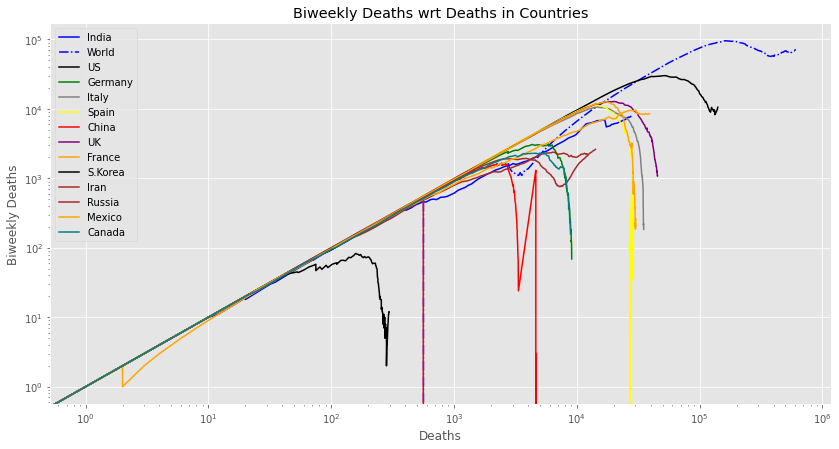

In [16]:
plot2(Deaths, Biweekly_Deaths, 'Biweekly Deaths')

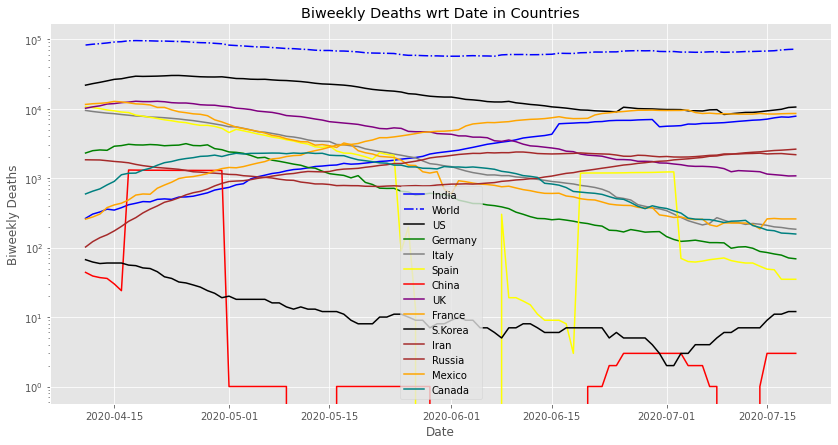

In [17]:
plotter(Biweekly_Deaths[Important_countries].tail(100), 'Biweekly Deaths', True)

In [18]:
# Biweekly increase in biweekly deaths
Increase_Biweekly = Biweekly_Deaths-Biweekly_Deaths.shift(14)
Increase_Biweekly = Increase_Biweekly.fillna(0).astype('int')
Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-07-06,-390,-251,39,-81,-481,-1124,1,-590,-197,-3,598,-149,4,-330
2020-07-07,-560,156,500,-60,-408,-1122,-1,-486,-211,-1,630,-86,-91,-289
2020-07-08,-557,158,723,-58,-260,-1122,-1,-418,-210,-1,598,-6,-495,-264
2020-07-09,-500,-2864,-2250,-51,-263,-1123,-3,-479,-179,1,629,160,-650,-266
2020-07-10,-363,-2910,-1827,-84,-255,-1137,-3,-595,-178,1,628,165,-919,-206
2020-07-11,-322,-2747,-1379,-73,-186,-1143,-3,-464,-154,2,637,91,-1160,-151
2020-07-12,-256,-1597,-1135,-64,-177,-1147,-3,-479,-145,2,650,136,-1149,-117
2020-07-13,-159,-1799,-1083,-71,-150,-1150,-3,-480,-161,3,642,199,-1171,-192
2020-07-14,1412,464,-786,-82,-145,-1165,-2,-418,-110,4,642,259,-901,-184


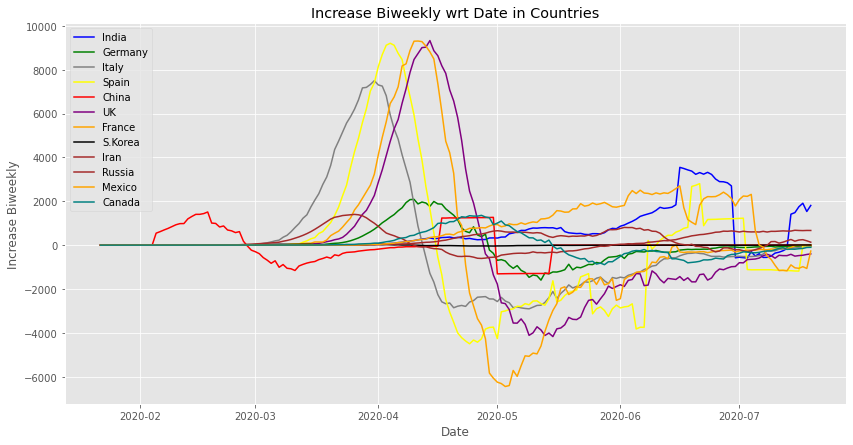

In [19]:
plotter(Increase_Biweekly[[c for c in Important_countries if c not in ['World', 'US']]], 'Increase Biweekly', False)

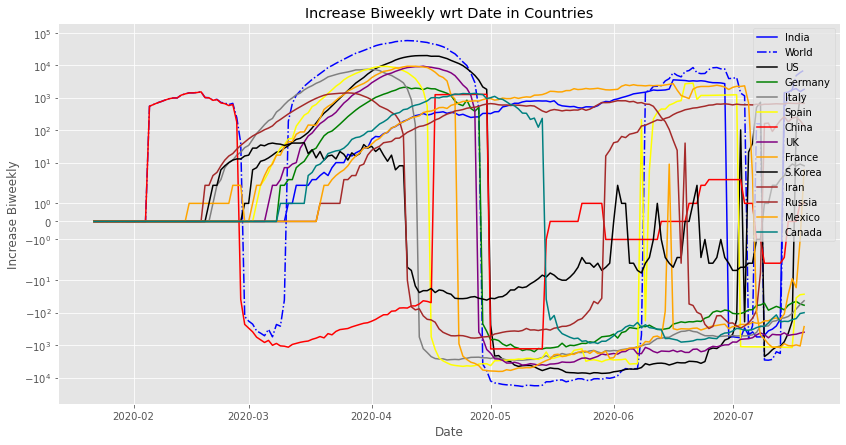

In [20]:
plotter(Increase_Biweekly, 'Increase Biweekly', log = 'symlog')

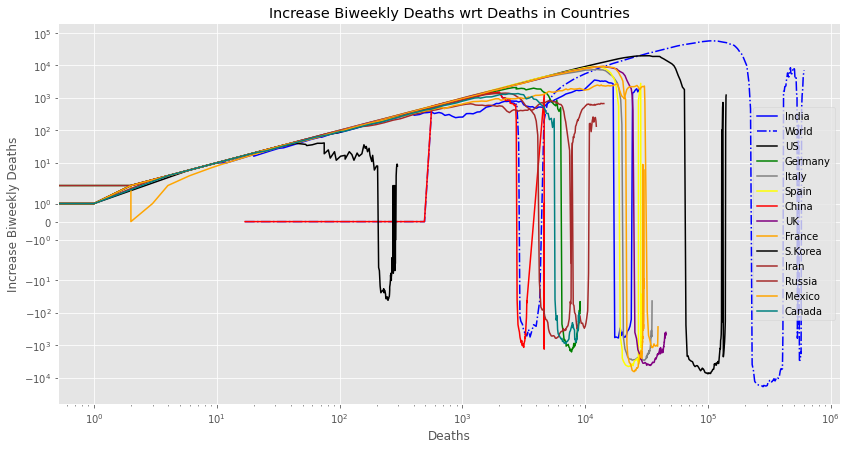

In [21]:
plot2(Deaths, Increase_Biweekly, 'Increase Biweekly Deaths', log = 'symlog')

In [22]:
Slope = np.round(Increase_Biweekly/Biweekly_Deaths, 4)
Slope[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-07-06,-0.0634,-0.0039,0.0042,-0.6585,-2.2689,-17.5625,0.5000,-0.3984,-0.7665,-0.7500,0.3007,-0.0715,0.0005,-1.2992
2020-07-07,-0.0908,0.0024,0.0519,-0.5085,-1.8214,-16.7463,-1.0000,-0.3317,-0.9906,-0.2500,0.3046,-0.0404,-0.0105,-1.1423
2020-07-08,-0.0893,0.0024,0.0746,-0.4915,-0.9630,-16.2609,-1.0000,-0.2909,-1.0396,-0.2000,0.2864,-0.0028,-0.0584,-1.0909
2020-07-09,-0.0793,-0.0441,-0.2723,-0.4359,-1.0605,-15.8169,-inf,-0.3489,-0.7885,0.1667,0.2892,0.0717,-0.0768,-1.1565
2020-07-10,-0.0564,-0.0445,-0.2157,-0.8571,-1.1087,-17.4923,-inf,-0.4810,-0.7876,0.1667,0.2844,0.0740,-0.1092,-0.8583
2020-07-11,-0.0490,-0.0418,-0.1593,-0.7157,-0.8122,-18.4355,-inf,-0.3611,-0.6814,0.2857,0.2805,0.0408,-0.1389,-0.6240
2020-07-12,-0.0382,-0.0240,-0.1283,-0.6214,-0.8194,-19.1167,-inf,-0.3772,-0.6416,0.2857,0.2801,0.0602,-0.1375,-0.4737
2020-07-13,-0.0233,-0.0270,-0.1223,-0.7245,-0.6726,-19.1667,-inf,-0.3822,-0.7454,0.4286,0.2718,0.0877,-0.1399,-0.9231
2020-07-14,0.2044,0.0069,-0.0870,-0.9318,-0.6682,-21.5741,-2.0000,-0.3376,-0.5914,0.5714,0.2682,0.1131,-0.1053,-0.9436


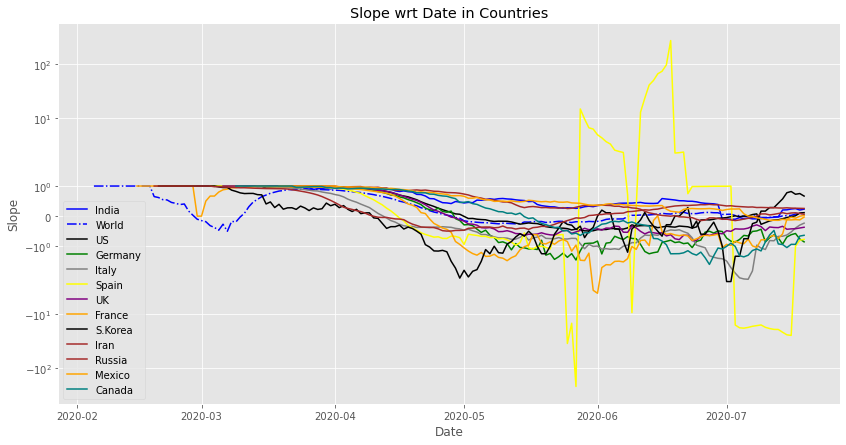

In [23]:
plotter(Slope[[c for c in Important_countries if c!='China']], 'Slope', log = 'symlog')

In [24]:
# Biweekly increase in increase of Biweekly Deaths
Growth_Increase_Biweekly = Increase_Biweekly-Increase_Biweekly.shift(14)
Growth_Increase_Biweekly = Growth_Increase_Biweekly.fillna(0).astype('int')
Growth_Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-07-06,-3627,-6082,3310,101,-87,-2010,0,729,101,-5,107,-52,-2107,341
2020-07-07,-3880,-5345,4129,126,48,-2292,-3,1108,131,1,109,26,-2304,386
2020-07-08,-3781,-5407,3920,90,252,-2294,-3,1079,101,0,50,223,-2702,392
2020-07-09,-3516,-10209,-895,83,251,-2300,-6,757,99,4,40,468,-2866,327
2020-07-10,-3260,-11230,-599,13,254,-2324,-6,492,78,4,30,431,-3217,410
2020-07-11,-3212,-11233,-109,15,360,-2337,-6,659,93,4,-1,216,-3576,480
2020-07-12,-3099,-9312,-96,30,360,-2345,-6,565,89,3,19,259,-3445,363
2020-07-13,-2860,-9453,-384,12,373,-2351,-6,504,65,5,-6,360,-3299,232
2020-07-14,1989,-3411,-163,5,368,-2375,-5,555,201,7,13,470,-2687,230


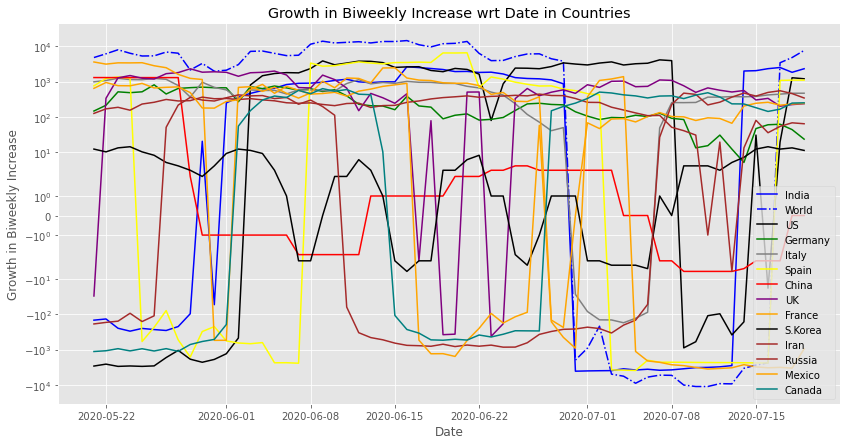

In [25]:
plotter(Growth_Increase_Biweekly.tail(60), 'Growth in Biweekly Increase', log = 'symlog')

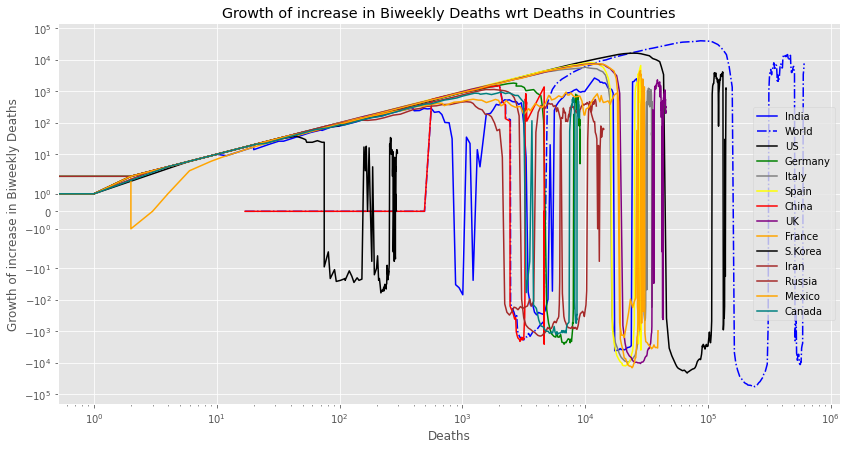

In [26]:
plot2(Deaths, Growth_Increase_Biweekly, 'Growth of increase in Biweekly Deaths', log = 'symlog')

In [27]:
Slope_growth = np.round(Growth_Increase_Biweekly/Biweekly_Deaths, 4)
Slope_growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-07-06,-0.5899,-0.0933,0.3569,0.8211,-0.4104,-31.4062,0.0,0.4922,0.3930,-1.2500,0.0538,-0.0250,-0.2469,1.3425
2020-07-07,-0.6293,-0.0810,0.4286,1.0678,0.2143,-34.2090,-3.0,0.7563,0.6150,0.2500,0.0527,0.0122,-0.2668,1.5257
2020-07-08,-0.6064,-0.0819,0.4043,0.7627,0.9333,-33.2464,-3.0,0.7509,0.5000,0.0000,0.0239,0.1039,-0.3189,1.6198
2020-07-09,-0.5578,-0.1574,-0.1083,0.7094,1.0121,-32.3944,-inf,0.5513,0.4361,0.6667,0.0184,0.2097,-0.3385,1.4217
2020-07-10,-0.5064,-0.1718,-0.0707,0.1327,1.1043,-35.7538,-inf,0.3977,0.3451,0.6667,0.0136,0.1933,-0.3824,1.7083
2020-07-11,-0.4883,-0.1708,-0.0126,0.1471,1.5721,-37.6935,-inf,0.5128,0.4115,0.5714,-0.0004,0.0969,-0.4283,1.9835
2020-07-12,-0.4626,-0.1397,-0.0109,0.2913,1.6667,-39.0833,-inf,0.4449,0.3938,0.4286,0.0082,0.1147,-0.4122,1.4696
2020-07-13,-0.4185,-0.1417,-0.0434,0.1224,1.6726,-39.1833,-inf,0.4013,0.3009,0.7143,-0.0025,0.1586,-0.3941,1.1154
2020-07-14,0.2879,-0.0507,-0.0180,0.0568,1.6959,-43.9815,-5.0,0.4483,1.0806,1.0000,0.0054,0.2052,-0.3140,1.1795


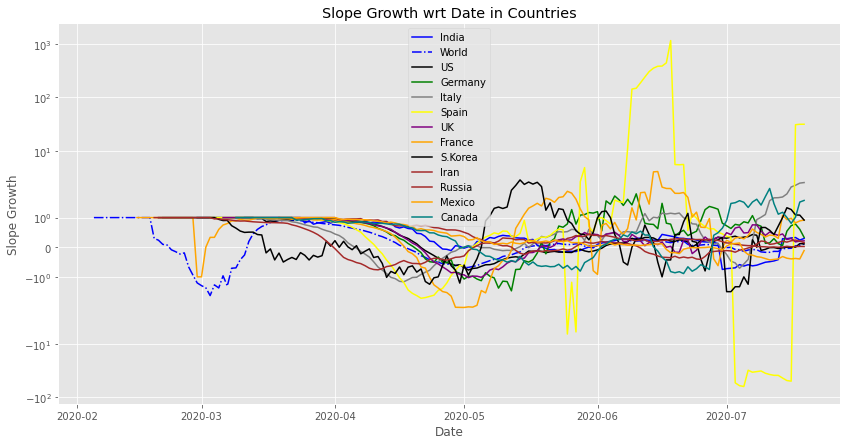

In [28]:
plotter(Slope_growth[[c for c in Important_countries if c!='China']], 'Slope Growth', log = 'symlog')

In [29]:
Biweekly_Growth = np.round(Deaths/Deaths.shift(14), 4)
Biweekly_Growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-07-06,1.4388,1.1379,1.0766,1.0138,1.0061,1.0023,1.0004,1.0346,1.0087,1.0142,1.2042,1.2543,1.3779,1.0299
2020-07-07,1.4259,1.1380,1.0791,1.0132,1.0065,1.0024,1.0002,1.0341,1.0072,1.0142,1.2097,1.2550,1.3695,1.0297
2020-07-08,1.4186,1.1366,1.0791,1.0132,1.0078,1.0024,1.0002,1.0333,1.0068,1.0177,1.2089,1.2525,1.3483,1.0283
2020-07-09,1.4119,1.1324,1.0661,1.0131,1.0072,1.0025,1.0000,1.0317,1.0076,1.0213,1.2147,1.2597,1.3378,1.0268
2020-07-10,1.4105,1.1321,1.0674,1.0109,1.0066,1.0023,1.0000,1.0284,1.0076,1.0213,1.2156,1.2543,1.3263,1.0280
2020-07-11,1.4087,1.1317,1.0686,1.0114,1.0066,1.0022,1.0000,1.0295,1.0076,1.0248,1.2191,1.2489,1.3165,1.0282
2020-07-12,1.4066,1.1326,1.0700,1.0115,1.0062,1.0021,1.0000,1.0291,1.0076,1.0248,1.2209,1.2492,1.3136,1.0288
2020-07-13,1.4045,1.1319,1.0699,1.0109,1.0064,1.0021,1.0000,1.0288,1.0072,1.0248,1.2214,1.2480,1.3086,1.0241
2020-07-14,1.3971,1.1316,1.0709,1.0098,1.0062,1.0019,1.0002,1.0283,1.0062,1.0248,1.2213,1.2462,1.3082,1.0225


In [30]:
Reproductivity = np.round(Biweekly_Deaths/Biweekly_Deaths.shift(14), 4)
Reproductivity[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-07-06,0.9403,0.9962,1.0042,0.6029,0.3059,0.0539,2.0000,0.7151,0.5661,0.5714,1.4299,0.9333,1.0005,0.4349
2020-07-07,0.9167,1.0024,1.0547,0.6629,0.3544,0.0563,0.5000,0.7509,0.5024,0.8000,1.4381,0.9612,0.9896,0.4668
2020-07-08,0.9180,1.0024,1.0806,0.6705,0.5094,0.0579,0.5000,0.7747,0.4903,0.8333,1.4013,0.9972,0.9448,0.4783
2020-07-09,0.9265,0.9577,0.7860,0.6964,0.4853,0.0595,0.0000,0.7414,0.5591,1.2000,1.4069,1.0772,0.9287,0.4637
2020-07-10,0.9466,0.9574,0.8226,0.5385,0.4742,0.0541,0.0000,0.6752,0.5594,1.2000,1.3975,1.0799,0.9015,0.5381
2020-07-11,0.9533,0.9599,0.8626,0.5829,0.5518,0.0515,0.0000,0.7347,0.5947,1.4000,1.3898,1.0425,0.8780,0.6158
2020-07-12,0.9632,0.9766,0.8863,0.6168,0.5496,0.0497,0.0000,0.7261,0.6092,1.4000,1.3890,1.0641,0.8791,0.6786
2020-07-13,0.9773,0.9737,0.8910,0.5799,0.5979,0.0496,0.0000,0.7235,0.5729,1.7500,1.3733,1.0961,0.8773,0.5200
2020-07-14,1.2569,1.0069,0.9200,0.5176,0.5994,0.0443,0.3333,0.7476,0.6284,2.3333,1.3664,1.1275,0.9047,0.5145


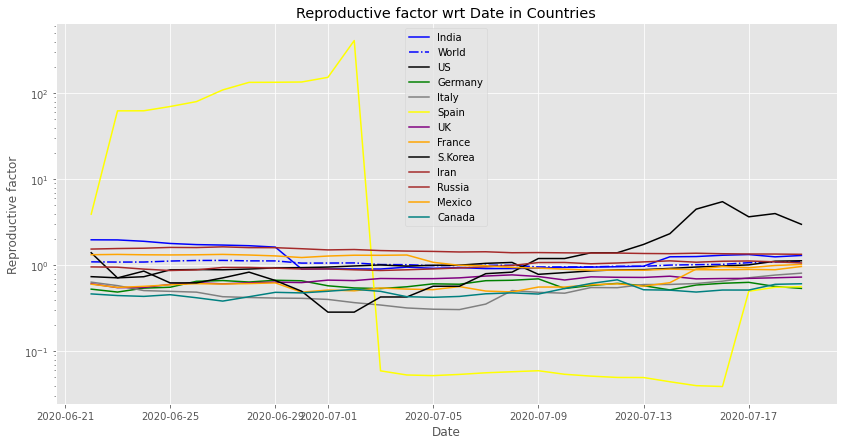

In [31]:
plotter(Reproductivity[[c for c in Important_countries if c != 'China']].tail(28), 'Reproductive factor', True)

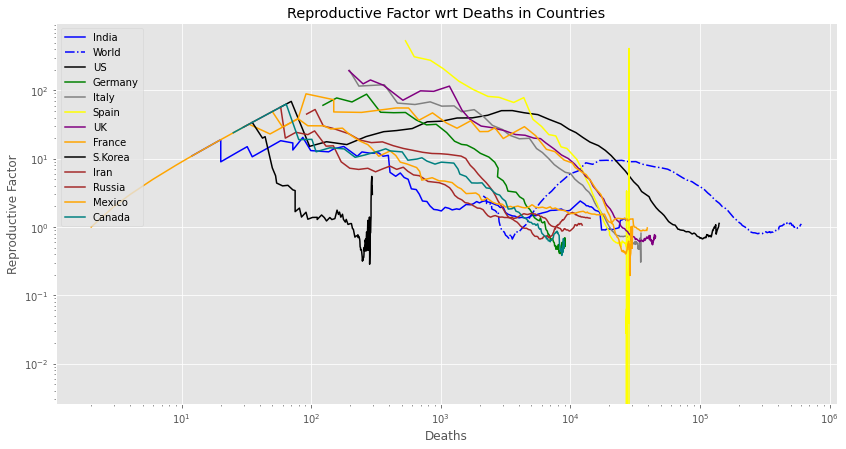

In [32]:
plot2(Deaths[[c for c in Important_countries if c != 'China']], 
      Reproductivity[[c for c in Important_countries if c != 'China']], 
      'Reproductive Factor', log = True)

In [33]:
Daily_Deaths = Deaths-Deaths.shift(1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-07-06,466,3797,325,-1,8,3,0,16,27,1,160,135,480,9
2020-07-07,483,6107,1195,10,30,4,0,155,13,0,200,198,895,17
2020-07-08,487,5319,820,14,15,4,0,126,0,2,153,172,782,21
2020-07-09,475,5458,990,11,12,5,0,85,46,1,221,176,730,11
2020-07-10,519,5311,811,6,12,2,0,48,25,0,142,174,665,14
2020-07-11,550,4897,676,7,7,0,0,148,0,1,188,188,539,7
2020-07-12,501,3954,428,1,9,0,0,21,0,0,194,130,276,11
2020-07-13,553,3815,361,3,13,3,0,11,25,0,203,104,485,7
2020-07-14,582,5660,900,4,17,3,1,138,0,0,179,175,836,9


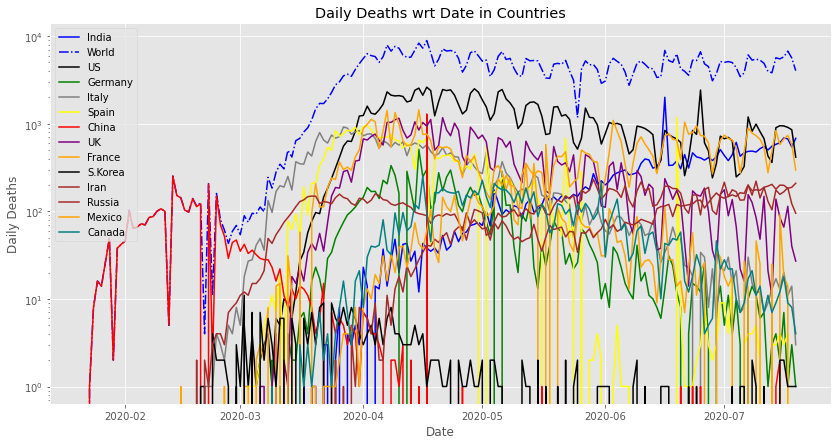

In [34]:
plotter(Daily_Deaths, 'Daily Deaths')

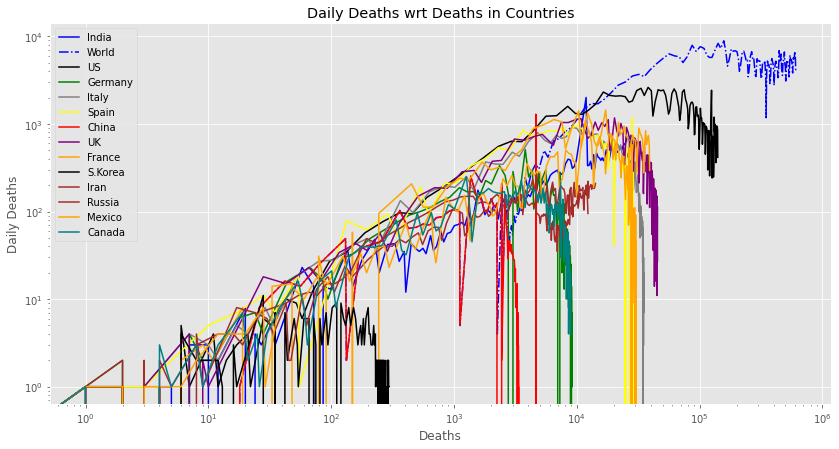

In [35]:
plot2(Deaths, Daily_Deaths, 'Daily Deaths')

In [36]:
#Confirmed = np.round(Removed + Removed*Reproductivity)
Confirmed = np.round(Removed * Biweekly_Growth)
Confirmed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-07-06,2900477.0,61214810.0,14026483.0,914650.0,3508170.0,2845329.0,464286.0,4585451.0,3018333.0,28905.0,1412647.0,1289420.0,4287887.0,900957.0
2020-07-07,2943343.0,61915166.0,14188007.0,915122.0,3512584.0,2846014.0,464193.0,4599263.0,3015154.0,28905.0,1443293.0,1314989.0,4384317.0,902532.0
2020-07-08,2997360.0,62443554.0,14276493.0,916541.0,3518633.0,2846415.0,464193.0,4608725.0,3013956.0,29208.0,1460835.0,1333912.0,4421885.0,903464.0
2020-07-09,3050269.0,62830874.0,14210047.0,917565.0,3517747.0,2847200.0,464100.0,4610358.0,3020986.0,29413.0,1494688.0,1363751.0,4485108.0,903276.0
2020-07-10,3120449.0,63415487.0,14313941.0,916179.0,3516859.0,2846833.0,464100.0,4600547.0,3023505.0,29413.0,1513057.0,1379730.0,4534752.0,905771.0
2020-07-11,3193946.0,63947274.0,14402270.0,917340.0,3517564.0,2846549.0,464100.0,4620705.0,3023505.0,29617.0,1540333.0,1397269.0,4572204.0,906667.0
2020-07-12,3259655.0,64445959.0,14466935.0,917532.0,3517071.0,2846265.0,464100.0,4621071.0,3023505.0,29617.0,1566293.0,1413845.0,4598388.0,908328.0
2020-07-13,3332457.0,64837949.0,14504206.0,917291.0,3519079.0,2846565.0,464100.0,4620855.0,3024823.0,29617.0,1591728.0,1425466.0,4644352.0,904895.0
2020-07-14,3396210.0,65461249.0,14614144.0,916696.0,3520090.0,2846298.0,464293.0,4632800.0,3021820.0,29617.0,1613459.0,1445218.0,4752298.0,904401.0


In [37]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [38]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Increase Biweekly':Increase_Biweekly,
    'GBI':Growth_Increase_Biweekly,
    'Slope Increase':Slope,
    'Slope Growth':Slope_growth ,
    'Removed':Removed,
    'Biweekly Growth':Biweekly_Growth,
    'Reproductive Factor':Reproductivity,
    'Daily Deaths':Daily_Deaths,
    'Confirmed':Confirmed
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=1200]

In [39]:
LastDay_DF.sort_values('Deaths', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
World,606173,72007,7042,7645,0.0978,0.1062,60617300,1.1348,1.1084,4029,68788512.0
US,140534,10574,1218,1197,0.1152,0.1132,14053400,1.0814,1.1302,415,15197347.0
Brazil,79488,14621,345,205,0.0236,0.0140,7948800,1.2254,1.0242,716,9740460.0
UK,45385,1080,-399,234,-0.3694,0.2167,4538500,1.0244,0.7302,27,4649239.0
Mexico,39184,8545,-269,-957,-0.0315,-0.1120,3918400,1.2789,0.9695,296,5011242.0
Italy,35045,184,-43,465,-0.2337,2.5272,3504500,1.0053,0.8106,3,3523074.0
France,30155,259,6,238,0.0232,0.9189,3015500,1.0087,1.0237,0,3041735.0
Spain,28420,35,-27,1098,-0.7714,31.3714,2842000,1.0012,0.5645,0,2845410.0
India,27497,7804,1810,2308,0.2319,0.2957,2749700,1.3963,1.3020,681,3839406.0


In [40]:
LastDay_DF.sort_values('Reproductive Factor', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
Philippines,1831,534,406,444,0.7603,0.8315,183100,1.4117,4.1719,58,258482.0
Argentina,2260,753,257,108,0.3413,0.1434,226000,1.4997,1.5181,40,338932.0
China,4644,3,1,0,0.3333,0.0000,464400,1.0006,1.5000,0,464679.0
Colombia,6736,2672,845,-4,0.3162,-0.0015,673600,1.6575,1.4625,220,1116492.0
South Africa,5033,1834,565,228,0.3081,0.1243,503300,1.5733,1.4452,85,791842.0
Indonesia,4143,972,266,174,0.2737,0.1790,414300,1.3065,1.3768,127,541283.0
Iran,14188,2617,669,63,0.2556,0.0241,1418800,1.2262,1.3434,209,1739733.0
India,27497,7804,1810,2308,0.2319,0.2957,2749700,1.3963,1.3020,681,3839406.0
Guatemala,1485,538,122,-15,0.2268,-0.0279,148500,1.5681,1.2933,36,232863.0
